# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost
from sklearn.ensemble import RandomForestRegressor
import pdpbox
from sklearn.model_selection import train_test_split
from pdpbox import info_plots, pdp
from scipy import stats
import seaborn as sns

/Users/pythonash/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Data and setting

In [2]:
Busan = pd.read_csv('../Data/1118_Busan.csv')
Busan_Train = pd.read_csv('../Data/0203_Busantrain.csv')
Busan_Test = pd.read_csv('../Data/0209_Busantest.csv')

Daegu = pd.read_csv('../Data/1118_Daegu.csv')
Daegu_Train = pd.read_csv('../Data/0203_Daegutrain.csv')
Daegu_Test = pd.read_csv('../Data/0209_Daegutest.csv')

Daejeon = pd.read_csv('../Data/1118_Daejeon.csv')
Daejeon_Train = pd.read_csv('../Data/0203_Daejeontrain.csv')
Daejeon_Test = pd.read_csv('../Data/0209_Daejeontest.csv')

Gwangju = pd.read_csv('../Data/1118_Gwangju.csv')
Gwangju_Train = pd.read_csv('../Data/0203_Gwangjutrain.csv')
Gwangju_Test = pd.read_csv('../Data/0209_Gwangjutest.csv')

Columns_ = ['전용면적', '층', '세대수', '가구당주차', '난방연료','건축년도',
            'ln_녹지거리', 'ln_수변거리',
            '버스정류장수', 'ln_지하철도로망거리', '서울대입학자수',
            '성비', '인구밀도', '고학력자비율',
            '봄', '가을', '겨울']

Columns_Without_Higherdegree = ['전용면적', '층', '세대수', '가구당주차', '난방연료','건축년도',
            'ln_녹지거리', 'ln_수변거리',
            '버스정류장수', 'ln_지하철도로망거리', '서울대입학자수',
            '성비', '인구밀도',
            '봄', '가을', '겨울']

Columns_Without_Snu = ['전용면적', '층', '세대수', '가구당주차', '난방연료','건축년도',
            'ln_녹지거리', 'ln_수변거리',
            '버스정류장수', 'ln_지하철도로망거리',
            '성비', '인구밀도', '고학력자비율',
            '봄', '가을', '겨울']

Columns_Without_Higherdegree_Snu = ['전용면적', '층', '세대수', '가구당주차', '난방연료','건축년도',
            'ln_녹지거리', 'ln_수변거리',
            '버스정류장수', 'ln_지하철도로망거리',
            '성비', '인구밀도',
            '봄', '가을', '겨울']

def RMSE(real, pred):
    return np.sqrt(np.dot(np.array(real - pred).T, np.array(real - pred))/len(real))

def f_test(x, y):


    var_x = np.var(x, ddof=1)
    var_y = np.var(y, ddof=1)

    if var_x > var_y:
        f = var_x / var_y
        dfn = x.size - 1
        dfd = y.size - 1
    else:
        f = var_y / var_x
        dfn = y.size - 1
        dfd = x.size - 1

    p = 1 - stats.f.cdf(f, dfn, dfd)

    print('F statistic:', round(f,3))
    print('P value:', round(p, 3))


# Regression using ML models

## Random Forest

In [3]:
#### Busan ####
Busan_RF = RandomForestRegressor(random_state= 2022314397, n_jobs= -1)
Busan_RF.fit(Busan_Train[Columns_], Busan_Train['ln_거래금액'])
Busan_Without_Higherdegree_RF = RandomForestRegressor(random_state= 2022314397, n_jobs= -1)
Busan_Without_Higherdegree_RF.fit(Busan_Train[Columns_Without_Higherdegree], Busan_Train['ln_거래금액'])
Busan_Without_Snu_RF = RandomForestRegressor(random_state= 2022314397, n_jobs= -1)
Busan_Without_Snu_RF.fit(Busan_Train[Columns_Without_Snu], Busan_Train['ln_거래금액'])
Busan_Without_Higherdegree_Snu_RF = RandomForestRegressor(random_state= 2022314397, n_jobs= -1)
Busan_Without_Higherdegree_Snu_RF.fit(Busan_Train[Columns_Without_Higherdegree_Snu], Busan_Train['ln_거래금액'])

#### Daegu ####
Daegu_RF = RandomForestRegressor(random_state= 2022314397, n_jobs= -1)
Daegu_RF.fit(Daegu_Train[Columns_], Daegu_Train['ln_거래금액'])
Daegu_Without_Higherdegree_RF = RandomForestRegressor(random_state= 2022314397, n_jobs= -1)
Daegu_Without_Higherdegree_RF.fit(Daegu_Train[Columns_Without_Higherdegree], Daegu_Train['ln_거래금액'])
Daegu_Without_Snu_RF = RandomForestRegressor(random_state= 2022314397, n_jobs= -1)
Daegu_Without_Snu_RF.fit(Daegu_Train[Columns_Without_Snu], Daegu_Train['ln_거래금액'])
Daegu_Without_Higherdegree_Snu_RF = RandomForestRegressor(random_state= 2022314397, n_jobs= -1)
Daegu_Without_Higherdegree_Snu_RF.fit(Daegu_Train[Columns_Without_Higherdegree_Snu], Daegu_Train['ln_거래금액'])

#### Daejeon ####
Daejeon_RF = RandomForestRegressor(random_state= 2022314397, n_jobs= -1)
Daejeon_RF.fit(Daejeon_Train[Columns_], Daejeon_Train['ln_거래금액'])
Daejeon_Without_Higherdegree_RF = RandomForestRegressor(random_state= 2022314397, n_jobs= -1)
Daejeon_Without_Higherdegree_RF.fit(Daejeon_Train[Columns_Without_Higherdegree], Daejeon_Train['ln_거래금액'])
Daejeon_Without_Snu_RF = RandomForestRegressor(random_state= 2022314397, n_jobs= -1)
Daejeon_Without_Snu_RF.fit(Daejeon_Train[Columns_Without_Snu], Daejeon_Train['ln_거래금액'])
Daejeon_Without_Higherdegree_Snu_RF = RandomForestRegressor(random_state= 2022314397, n_jobs= -1)
Daejeon_Without_Higherdegree_Snu_RF.fit(Daejeon_Train[Columns_Without_Higherdegree_Snu], Daejeon_Train['ln_거래금액'])

#### Gwangju ####
Gwangju_RF = RandomForestRegressor(random_state= 2022314397, n_jobs= -1)
Gwangju_RF.fit(Gwangju_Train[Columns_], Gwangju_Train['ln_거래금액'])
Gwangju_Without_Higherdegree_RF = RandomForestRegressor(random_state= 2022314397, n_jobs= -1)
Gwangju_Without_Higherdegree_RF.fit(Gwangju_Train[Columns_Without_Higherdegree], Gwangju_Train['ln_거래금액'])
Gwangju_Without_Snu_RF = RandomForestRegressor(random_state= 2022314397, n_jobs= -1)
Gwangju_Without_Snu_RF.fit(Gwangju_Train[Columns_Without_Snu], Gwangju_Train['ln_거래금액'])
Gwangju_Without_Higherdegree_Snu_RF = RandomForestRegressor(random_state= 2022314397, n_jobs= -1)
Gwangju_Without_Higherdegree_Snu_RF.fit(Gwangju_Train[Columns_Without_Higherdegree_Snu], Gwangju_Train['ln_거래금액'])

RandomForestRegressor(n_jobs=-1, random_state=2022314397)

## XGBoost

In [4]:
#### Busan ####
Busan_XGB = xgboost.XGBRegressor(random_state = 2022314397, n_jobs = -1)
Busan_XGB.fit(Busan_Train[Columns_], Busan_Train['ln_거래금액'])
Busan_Without_Higherdegree_XGB = xgboost.XGBRegressor(random_state = 2022314397, n_jobs = -1)
Busan_Without_Higherdegree_XGB.fit(Busan_Train[Columns_Without_Higherdegree], Busan_Train['ln_거래금액'])
Busan_Without_Snu_XGB = xgboost.XGBRegressor(random_state = 2022314397, n_jobs = -1)
Busan_Without_Snu_XGB.fit(Busan_Train[Columns_Without_Snu], Busan_Train['ln_거래금액'])
Busan_Without_Higherdegree_Snu_XGB = xgboost.XGBRegressor(random_state = 2022314397, n_jobs = -1)
Busan_Without_Higherdegree_Snu_XGB.fit(Busan_Train[Columns_Without_Higherdegree_Snu], Busan_Train['ln_거래금액'])

#### Daegu ####
Daegu_XGB = xgboost.XGBRegressor(random_state = 2022314397, n_jobs = -1)
Daegu_XGB.fit(Daegu_Train[Columns_], Daegu_Train['ln_거래금액'])
Daegu_Without_Higherdegree_XGB = xgboost.XGBRegressor(random_state = 2022314397, n_jobs = -1)
Daegu_Without_Higherdegree_XGB.fit(Daegu_Train[Columns_Without_Higherdegree], Daegu_Train['ln_거래금액'])
Daegu_Without_Snu_XGB = xgboost.XGBRegressor(random_state = 2022314397, n_jobs = -1)
Daegu_Without_Snu_XGB.fit(Daegu_Train[Columns_Without_Snu], Daegu_Train['ln_거래금액'])
Daegu_Without_Higherdegree_Snu_XGB = xgboost.XGBRegressor(random_state = 2022314397, n_jobs = -1)
Daegu_Without_Higherdegree_Snu_XGB.fit(Daegu_Train[Columns_Without_Higherdegree_Snu], Daegu_Train['ln_거래금액'])

#### Daejeon ####
Daejeon_XGB = xgboost.XGBRegressor(random_state = 2022314397, n_jobs = -1)
Daejeon_XGB.fit(Daejeon_Train[Columns_], Daejeon_Train['ln_거래금액'])
Daejeon_Without_Higherdegree_XGB = xgboost.XGBRegressor(random_state = 2022314397, n_jobs = -1)
Daejeon_Without_Higherdegree_XGB.fit(Daejeon_Train[Columns_Without_Higherdegree], Daejeon_Train['ln_거래금액'])
Daejeon_Without_Snu_XGB = xgboost.XGBRegressor(random_state = 2022314397, n_jobs = -1)
Daejeon_Without_Snu_XGB.fit(Daejeon_Train[Columns_Without_Snu], Daejeon_Train['ln_거래금액'])
Daejeon_Without_Higherdegree_Snu_XGB = xgboost.XGBRegressor(random_state = 2022314397, n_jobs = -1)
Daejeon_Without_Higherdegree_Snu_XGB.fit(Daejeon_Train[Columns_Without_Higherdegree_Snu], Daejeon_Train['ln_거래금액'])

#### Gwangju ####
Gwangju_XGB = xgboost.XGBRegressor(random_state = 2022314397, n_jobs = -1)
Gwangju_XGB.fit(Gwangju_Train[Columns_], Gwangju_Train['ln_거래금액'])
Gwangju_Without_Higherdegree_XGB = xgboost.XGBRegressor(random_state = 2022314397, n_jobs = -1)
Gwangju_Without_Higherdegree_XGB.fit(Gwangju_Train[Columns_Without_Higherdegree], Gwangju_Train['ln_거래금액'])
Gwangju_Without_Snu_XGB = xgboost.XGBRegressor(random_state = 2022314397, n_jobs = -1)
Gwangju_Without_Snu_XGB.fit(Gwangju_Train[Columns_Without_Snu], Gwangju_Train['ln_거래금액'])
Gwangju_Without_Higherdegree_Snu_XGB = xgboost.XGBRegressor(random_state = 2022314397, n_jobs = -1)
Gwangju_Without_Higherdegree_Snu_XGB.fit(Gwangju_Train[Columns_Without_Higherdegree_Snu], Gwangju_Train['ln_거래금액'])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=-1,
             num_parallel_tree=None, random_state=2022314397, ...)

# Regress

## OLS

In [5]:
#### Busan ####
Busan_OLS_Y = Busan_Test['Result_ols']
Busan_Without_Higherdegree_OLS_Y = Busan_Test['Result_ols_higherdegree']
Busan_Without_Snu_OLS_Y = Busan_Test['Result_ols_snu']
Busan_Without_Higherdegree_Snu_OLS_Y = Busan_Test['Result_ols_both']

#### Daegu ####
Daegu_OLS_Y = Daegu_Test['Result_ols']
Daegu_Without_Higherdegree_OLS_Y = Daegu_Test['Result_ols_higherdegree']
Daegu_Without_Snu_OLS_Y = Daegu_Test['Result_ols_snu']
Daegu_Without_Higherdegree_Snu_OLS_Y = Daegu_Test['Result_ols_both']

#### Daejeon ####
Daejeon_OLS_Y = Daejeon_Test['Result_ols']
Daejeon_Without_Higherdegree_OLS_Y = Daejeon_Test['Result_ols_higherdegree']
Daejeon_Without_Snu_OLS_Y = Daejeon_Test['Result_ols_snu']
Daejeon_Without_Higherdegree_Snu_OLS_Y = Daejeon_Test['Result_ols_both']

#### Gwangju ####
Gwangju_OLS_Y = Gwangju_Test['Result_ols']
Gwangju_Without_Higherdegree_OLS_Y = Gwangju_Test['Result_ols_higherdegree']
Gwangju_Without_Snu_OLS_Y = Gwangju_Test['Result_ols_snu']
Gwangju_Without_Higherdegree_Snu_OLS_Y = Gwangju_Test['Result_ols_both']

## SLR

In [6]:
#### Busan ####
Busan_SLR_Y = Busan_Test['Result_lag']
Busan_Without_Higherdegree_SLR_Y = Busan_Test['Result_lag_higherdegree']
Busan_Without_Snu_SLR_Y = Busan_Test['Result_lag_snu']
Busan_Without_Higherdegree_Snu_SLR_Y = Busan_Test['Result_lag_both']

#### Daegu ####
Daegu_SLR_Y = Daegu_Test['Result_lag']
Daegu_Without_Higherdegree_SLR_Y = Daegu_Test['Result_lag_higherdegree']
Daegu_Without_Snu_SLR_Y = Daegu_Test['Result_lag_snu']
Daegu_Without_Higherdegree_Snu_SLR_Y = Daegu_Test['Result_lag_both']

#### Daejeon ####
Daejeon_SLR_Y = Daejeon_Test['Result_lag']
Daejeon_Without_Higherdegree_SLR_Y = Daejeon_Test['Result_lag_higherdegree']
Daejeon_Without_Snu_SLR_Y = Daejeon_Test['Result_lag_snu']
Daejeon_Without_Higherdegree_Snu_SLR_Y = Daejeon_Test['Result_lag_both']

#### Gwangju ####
Gwangju_SLR_Y = Gwangju_Test['Result_lag']
Gwangju_Without_Higherdegree_SLR_Y = Gwangju_Test['Result_lag_higherdegree']
Gwangju_Without_Snu_SLR_Y = Gwangju_Test['Result_lag_snu']
Gwangju_Without_Higherdegree_Snu_SLR_Y = Gwangju_Test['Result_lag_both']

## Random Forest

In [7]:
#### Busan ####
Busan_RF_Y = Busan_RF.predict(Busan_Test[Columns_])
Busan_Without_Higherdegree_RF_Y = Busan_Without_Higherdegree_RF.predict(Busan_Test[Columns_Without_Higherdegree])
Busan_Without_Snu_RF_Y = Busan_Without_Snu_RF.predict(Busan_Test[Columns_Without_Snu])
Busan_Without_Higherdegree_Snu_RF_Y = Busan_Without_Higherdegree_Snu_RF.predict(Busan_Test[Columns_Without_Higherdegree_Snu])

#### Daegu ####
Daegu_RF_Y = Daegu_RF.predict(Daegu_Test[Columns_])
Daegu_Without_Higherdegree_RF_Y = Daegu_Without_Higherdegree_RF.predict(Daegu_Test[Columns_Without_Higherdegree])
Daegu_Without_Snu_RF_Y = Daegu_Without_Snu_RF.predict(Daegu_Test[Columns_Without_Snu])
Daegu_Without_Higherdegree_Snu_RF_Y = Daegu_Without_Higherdegree_Snu_RF.predict(Daegu_Test[Columns_Without_Higherdegree_Snu])

#### Daejeon ####
Daejeon_RF_Y = Daejeon_RF.predict(Daejeon_Test[Columns_])
Daejeon_Without_Higherdegree_RF_Y = Daejeon_Without_Higherdegree_RF.predict(Daejeon_Test[Columns_Without_Higherdegree])
Daejeon_Without_Snu_RF_Y = Daejeon_Without_Snu_RF.predict(Daejeon_Test[Columns_Without_Snu])
Daejeon_Without_Higherdegree_Snu_RF_Y = Daejeon_Without_Higherdegree_Snu_RF.predict(Daejeon_Test[Columns_Without_Higherdegree_Snu])

#### Gwangju ####
Gwangju_RF_Y = Gwangju_RF.predict(Gwangju_Test[Columns_])
Gwangju_Without_Higherdegree_RF_Y = Gwangju_Without_Higherdegree_RF.predict(Gwangju_Test[Columns_Without_Higherdegree])
Gwangju_Without_Snu_RF_Y = Gwangju_Without_Snu_RF.predict(Gwangju_Test[Columns_Without_Snu])
Gwangju_Without_Higherdegree_Snu_RF_Y = Gwangju_Without_Higherdegree_Snu_RF.predict(Gwangju_Test[Columns_Without_Higherdegree_Snu])

## XGB

In [8]:
#### Busan ####
Busan_XGB_Y = Busan_XGB.predict(Busan_Test[Columns_])
Busan_Without_Higherdegree_XGB_Y = Busan_Without_Higherdegree_XGB.predict(Busan_Test[Columns_Without_Higherdegree])
Busan_Without_Snu_XGB_Y = Busan_Without_Snu_XGB.predict(Busan_Test[Columns_Without_Snu])
Busan_Without_Higherdegree_Snu_XGB_Y = Busan_Without_Higherdegree_Snu_XGB.predict(Busan_Test[Columns_Without_Higherdegree_Snu])

#### Daegu ####
Daegu_XGB_Y = Daegu_XGB.predict(Daegu_Test[Columns_])
Daegu_Without_Higherdegree_XGB_Y = Daegu_Without_Higherdegree_XGB.predict(Daegu_Test[Columns_Without_Higherdegree])
Daegu_Without_Snu_XGB_Y = Daegu_Without_Snu_XGB.predict(Daegu_Test[Columns_Without_Snu])
Daegu_Without_Higherdegree_Snu_XGB_Y = Daegu_Without_Higherdegree_Snu_XGB.predict(Daegu_Test[Columns_Without_Higherdegree_Snu])

#### Daejeon ####
Daejeon_XGB_Y = Daejeon_XGB.predict(Daejeon_Test[Columns_])
Daejeon_Without_Higherdegree_XGB_Y = Daejeon_Without_Higherdegree_XGB.predict(Daejeon_Test[Columns_Without_Higherdegree])
Daejeon_Without_Snu_XGB_Y = Daejeon_Without_Snu_XGB.predict(Daejeon_Test[Columns_Without_Snu])
Daejeon_Without_Higherdegree_Snu_XGB_Y = Daejeon_Without_Higherdegree_Snu_XGB.predict(Daejeon_Test[Columns_Without_Higherdegree_Snu])

#### Gwangju ####
Gwangju_XGB_Y = Gwangju_XGB.predict(Gwangju_Test[Columns_])
Gwangju_Without_Higherdegree_XGB_Y = Gwangju_Without_Higherdegree_XGB.predict(Gwangju_Test[Columns_Without_Higherdegree])
Gwangju_Without_Snu_XGB_Y = Gwangju_Without_Snu_XGB.predict(Gwangju_Test[Columns_Without_Snu])
Gwangju_Without_Higherdegree_Snu_XGB_Y = Gwangju_Without_Higherdegree_Snu_XGB.predict(Gwangju_Test[Columns_Without_Higherdegree_Snu])

# Comparison

## RMSE Original

In [9]:
#### Transacted prices ####
Busan_Y = Busan_Test['ln_거래금액'].copy()
Daegu_Y = Daegu_Test['ln_거래금액'].copy()
Daejeon_Y = Daejeon_Test['ln_거래금액'].copy()
Gwangju_Y = Gwangju_Test['ln_거래금액'].copy()

#### Difference between the transacted price and estimated price in four metropolises ####
Busan_OLS_RMSE = RMSE(Busan_Y, Busan_OLS_Y)
Busan_SLR_RMSE = RMSE(Busan_Y, Busan_SLR_Y)
Busan_RF_RMSE = RMSE(Busan_Y, Busan_RF_Y)
Busan_XGB_RMSE = RMSE(Busan_Y, Busan_XGB_Y)

Daegu_OLS_RMSE = RMSE(Daegu_Y, Daegu_OLS_Y)
Daegu_SLR_RMSE = RMSE(Daegu_Y, Daegu_SLR_Y)
Daegu_RF_RMSE = RMSE(Daegu_Y, Daegu_RF_Y)
Daegu_XGB_RMSE = RMSE(Daegu_Y, Daegu_XGB_Y)

Daejeon_OLS_RMSE = RMSE(Daejeon_Y, Daejeon_OLS_Y)
Daejeon_SLR_RMSE = RMSE(Daejeon_Y, Daejeon_SLR_Y)
Daejeon_RF_RMSE = RMSE(Daejeon_Y, Daejeon_RF_Y)
Daejeon_XGB_RMSE = RMSE(Daejeon_Y, Daejeon_XGB_Y)

Gwangju_OLS_RMSE = RMSE(Gwangju_Y, Gwangju_OLS_Y)
Gwangju_SLR_RMSE = RMSE(Gwangju_Y, Gwangju_SLR_Y)
Gwangju_RF_RMSE = RMSE(Gwangju_Y, Gwangju_RF_Y)
Gwangju_XGB_RMSE = RMSE(Gwangju_Y, Gwangju_XGB_Y)



## RMSE without Higherdegree

In [10]:
Busan_Without_Higherdegree_OLS_RMSE = RMSE(Busan_Y, Busan_Without_Higherdegree_OLS_Y)
Busan_Without_Higherdegree_SLR_RMSE = RMSE(Busan_Y, Busan_Without_Higherdegree_SLR_Y)
Busan_Without_Higherdegree_RF_RMSE = RMSE(Busan_Y, Busan_Without_Higherdegree_RF_Y)
Busan_Without_Higherdegree_XGB_RMSE = RMSE(Busan_Y, Busan_Without_Higherdegree_XGB_Y)

Daegu_Without_Higherdegree_OLS_RMSE = RMSE(Daegu_Y, Daegu_Without_Higherdegree_OLS_Y)
Daegu_Without_Higherdegree_SLR_RMSE = RMSE(Daegu_Y, Daegu_Without_Higherdegree_SLR_Y)
Daegu_Without_Higherdegree_RF_RMSE = RMSE(Daegu_Y, Daegu_Without_Higherdegree_RF_Y)
Daegu_Without_Higherdegree_XGB_RMSE = RMSE(Daegu_Y, Daegu_Without_Higherdegree_XGB_Y)

Daejeon_Without_Higherdegree_OLS_RMSE = RMSE(Daejeon_Y, Daejeon_Without_Higherdegree_OLS_Y)
Daejeon_Without_Higherdegree_SLR_RMSE = RMSE(Daejeon_Y, Daejeon_Without_Higherdegree_SLR_Y)
Daejeon_Without_Higherdegree_RF_RMSE = RMSE(Daejeon_Y, Daejeon_Without_Higherdegree_RF_Y)
Daejeon_Without_Higherdegree_XGB_RMSE = RMSE(Daejeon_Y, Daejeon_Without_Higherdegree_XGB_Y)

Gwangju_Without_Higherdegree_OLS_RMSE = RMSE(Gwangju_Y, Gwangju_Without_Higherdegree_OLS_Y)
Gwangju_Without_Higherdegree_SLR_RMSE = RMSE(Gwangju_Y, Gwangju_Without_Higherdegree_SLR_Y)
Gwangju_Without_Higherdegree_RF_RMSE = RMSE(Gwangju_Y, Gwangju_Without_Higherdegree_RF_Y)
Gwangju_Without_Higherdegree_XGB_RMSE = RMSE(Gwangju_Y, Gwangju_Without_Higherdegree_XGB_Y)

## RMSE without SNU

In [11]:
Busan_Without_Snu_OLS_RMSE = RMSE(Busan_Y, Busan_Without_Snu_OLS_Y)
Busan_Without_Snu_SLR_RMSE = RMSE(Busan_Y, Busan_Without_Snu_SLR_Y)
Busan_Without_Snu_RF_RMSE = RMSE(Busan_Y, Busan_Without_Snu_RF_Y)
Busan_Without_Snu_XGB_RMSE = RMSE(Busan_Y, Busan_Without_Snu_XGB_Y)

Daegu_Without_Snu_OLS_RMSE = RMSE(Daegu_Y, Daegu_Without_Snu_OLS_Y)
Daegu_Without_Snu_SLR_RMSE = RMSE(Daegu_Y, Daegu_Without_Snu_SLR_Y)
Daegu_Without_Snu_RF_RMSE = RMSE(Daegu_Y, Daegu_Without_Snu_RF_Y)
Daegu_Without_Snu_XGB_RMSE = RMSE(Daegu_Y, Daegu_Without_Snu_XGB_Y)

Daejeon_Without_Snu_OLS_RMSE = RMSE(Daejeon_Y, Daejeon_Without_Snu_OLS_Y)
Daejeon_Without_Snu_SLR_RMSE = RMSE(Daejeon_Y, Daejeon_Without_Snu_SLR_Y)
Daejeon_Without_Snu_RF_RMSE = RMSE(Daejeon_Y, Daejeon_Without_Snu_RF_Y)
Daejeon_Without_Snu_XGB_RMSE = RMSE(Daejeon_Y, Daejeon_Without_Snu_XGB_Y)

Gwangju_Without_Snu_OLS_RMSE = RMSE(Gwangju_Y, Gwangju_Without_Snu_OLS_Y)
Gwangju_Without_Snu_SLR_RMSE = RMSE(Gwangju_Y, Gwangju_Without_Snu_SLR_Y)
Gwangju_Without_Snu_RF_RMSE = RMSE(Gwangju_Y, Gwangju_Without_Snu_RF_Y)
Gwangju_Without_Snu_XGB_RMSE = RMSE(Gwangju_Y, Gwangju_Without_Snu_XGB_Y)

In [12]:
Busan_Without_Higherdegree_Snu_OLS_RMSE = RMSE(Busan_Y, Busan_Without_Higherdegree_Snu_OLS_Y)
Busan_Without_Higherdegree_Snu_SLR_RMSE = RMSE(Busan_Y, Busan_Without_Higherdegree_Snu_SLR_Y)
Busan_Without_Higherdegree_Snu_RF_RMSE = RMSE(Busan_Y, Busan_Without_Higherdegree_Snu_RF_Y)
Busan_Without_Higherdegree_Snu_XGB_RMSE = RMSE(Busan_Y, Busan_Without_Higherdegree_Snu_XGB_Y)

Daegu_Without_Higherdegree_Snu_OLS_RMSE = RMSE(Daegu_Y, Daegu_Without_Higherdegree_Snu_OLS_Y)
Daegu_Without_Higherdegree_Snu_SLR_RMSE = RMSE(Daegu_Y, Daegu_Without_Higherdegree_Snu_SLR_Y)
Daegu_Without_Higherdegree_Snu_RF_RMSE = RMSE(Daegu_Y, Daegu_Without_Higherdegree_Snu_RF_Y)
Daegu_Without_Higherdegree_Snu_XGB_RMSE = RMSE(Daegu_Y, Daegu_Without_Higherdegree_Snu_XGB_Y)

Daejeon_Without_Higherdegree_Snu_OLS_RMSE = RMSE(Daejeon_Y, Daejeon_Without_Higherdegree_Snu_OLS_Y)
Daejeon_Without_Higherdegree_Snu_SLR_RMSE = RMSE(Daejeon_Y, Daejeon_Without_Higherdegree_Snu_SLR_Y)
Daejeon_Without_Higherdegree_Snu_RF_RMSE = RMSE(Daejeon_Y, Daejeon_Without_Higherdegree_Snu_RF_Y)
Daejeon_Without_Higherdegree_Snu_XGB_RMSE = RMSE(Daejeon_Y, Daejeon_Without_Higherdegree_Snu_XGB_Y)

Gwangju_Without_Higherdegree_Snu_OLS_RMSE = RMSE(Gwangju_Y, Gwangju_Without_Higherdegree_Snu_OLS_Y)
Gwangju_Without_Higherdegree_Snu_SLR_RMSE = RMSE(Gwangju_Y, Gwangju_Without_Higherdegree_Snu_SLR_Y)
Gwangju_Without_Higherdegree_Snu_RF_RMSE = RMSE(Gwangju_Y, Gwangju_Without_Higherdegree_Snu_RF_Y)
Gwangju_Without_Higherdegree_Snu_XGB_RMSE = RMSE(Gwangju_Y, Gwangju_Without_Higherdegree_Snu_XGB_Y)

## Aggregate RMSE Results As Mean

In [13]:
Busan_OLS_RMSE_MEAN = np.mean([Busan_OLS_RMSE, Busan_Without_Higherdegree_OLS_RMSE, Busan_Without_Snu_OLS_RMSE, Busan_Without_Higherdegree_Snu_OLS_RMSE])
Busan_OLS_RMSE_STD = np.std([Busan_OLS_RMSE, Busan_Without_Higherdegree_OLS_RMSE, Busan_Without_Snu_OLS_RMSE, Busan_Without_Higherdegree_Snu_OLS_RMSE])
Busan_SLR_RMSE_MEAN = np.mean([Busan_SLR_RMSE, Busan_Without_Higherdegree_SLR_RMSE, Busan_Without_Snu_SLR_RMSE, Busan_Without_Higherdegree_Snu_SLR_RMSE])
Busan_SLR_RMSE_STD = np.std([Busan_SLR_RMSE, Busan_Without_Higherdegree_SLR_RMSE, Busan_Without_Snu_SLR_RMSE, Busan_Without_Higherdegree_Snu_SLR_RMSE])
Busan_RF_RMSE_MEAN = np.mean([Busan_RF_RMSE, Busan_Without_Higherdegree_RF_RMSE, Busan_Without_Snu_RF_RMSE, Busan_Without_Higherdegree_Snu_RF_RMSE])
Busan_RF_RMSE_STD = np.std([Busan_RF_RMSE, Busan_Without_Higherdegree_RF_RMSE, Busan_Without_Snu_RF_RMSE, Busan_Without_Higherdegree_Snu_RF_RMSE])
Busan_XGB_RMSE_MEAN = np.mean([Busan_XGB_RMSE, Busan_Without_Higherdegree_XGB_RMSE, Busan_Without_Snu_XGB_RMSE, Busan_Without_Higherdegree_Snu_XGB_RMSE])
Busan_XGB_RMSE_STD = np.std([Busan_XGB_RMSE, Busan_Without_Higherdegree_XGB_RMSE, Busan_Without_Snu_XGB_RMSE, Busan_Without_Higherdegree_Snu_XGB_RMSE])

Daegu_OLS_RMSE_MEAN = np.mean([Daegu_OLS_RMSE, Daegu_Without_Higherdegree_OLS_RMSE, Daegu_Without_Snu_OLS_RMSE, Daegu_Without_Higherdegree_Snu_OLS_RMSE])
Daegu_OLS_RMSE_STD = np.std([Daegu_OLS_RMSE, Daegu_Without_Higherdegree_OLS_RMSE, Daegu_Without_Snu_OLS_RMSE, Daegu_Without_Higherdegree_Snu_OLS_RMSE])
Daegu_SLR_RMSE_MEAN = np.mean([Daegu_SLR_RMSE, Daegu_Without_Higherdegree_SLR_RMSE, Daegu_Without_Snu_SLR_RMSE, Daegu_Without_Higherdegree_Snu_SLR_RMSE])
Daegu_SLR_RMSE_STD = np.std([Daegu_SLR_RMSE, Daegu_Without_Higherdegree_SLR_RMSE, Daegu_Without_Snu_SLR_RMSE, Daegu_Without_Higherdegree_Snu_SLR_RMSE])
Daegu_RF_RMSE_MEAN = np.mean([Daegu_RF_RMSE, Daegu_Without_Higherdegree_RF_RMSE, Daegu_Without_Snu_RF_RMSE, Daegu_Without_Higherdegree_Snu_RF_RMSE])
Daegu_RF_RMSE_STD = np.std([Daegu_RF_RMSE, Daegu_Without_Higherdegree_RF_RMSE, Daegu_Without_Snu_RF_RMSE, Daegu_Without_Higherdegree_Snu_RF_RMSE])
Daegu_XGB_RMSE_MEAN = np.mean([Daegu_XGB_RMSE, Daegu_Without_Higherdegree_XGB_RMSE, Daegu_Without_Snu_XGB_RMSE, Daegu_Without_Higherdegree_Snu_XGB_RMSE])
Daegu_XGB_RMSE_STD = np.std([Daegu_XGB_RMSE, Daegu_Without_Higherdegree_XGB_RMSE, Daegu_Without_Snu_XGB_RMSE, Daegu_Without_Higherdegree_Snu_XGB_RMSE])

Daejeon_OLS_RMSE_MEAN = np.mean([Daejeon_OLS_RMSE, Daejeon_Without_Higherdegree_OLS_RMSE, Daejeon_Without_Snu_OLS_RMSE, Daejeon_Without_Higherdegree_Snu_OLS_RMSE])
Daejeon_OLS_RMSE_STD = np.std([Daejeon_OLS_RMSE, Daejeon_Without_Higherdegree_OLS_RMSE, Daejeon_Without_Snu_OLS_RMSE, Daejeon_Without_Higherdegree_Snu_OLS_RMSE])
Daejeon_SLR_RMSE_MEAN = np.mean([Daejeon_SLR_RMSE, Daejeon_Without_Higherdegree_SLR_RMSE, Daejeon_Without_Snu_SLR_RMSE, Daejeon_Without_Higherdegree_Snu_SLR_RMSE])
Daejeon_SLR_RMSE_STD = np.std([Daejeon_SLR_RMSE, Daejeon_Without_Higherdegree_SLR_RMSE, Daejeon_Without_Snu_SLR_RMSE, Daejeon_Without_Higherdegree_Snu_SLR_RMSE])
Daejeon_RF_RMSE_MEAN = np.mean([Daejeon_RF_RMSE, Daejeon_Without_Higherdegree_RF_RMSE, Daejeon_Without_Snu_RF_RMSE, Daejeon_Without_Higherdegree_Snu_RF_RMSE])
Daejeon_RF_RMSE_STD = np.std([Daejeon_RF_RMSE, Daejeon_Without_Higherdegree_RF_RMSE, Daejeon_Without_Snu_RF_RMSE, Daejeon_Without_Higherdegree_Snu_RF_RMSE])
Daejeon_XGB_RMSE_MEAN = np.mean([Daejeon_XGB_RMSE, Daejeon_Without_Higherdegree_XGB_RMSE, Daejeon_Without_Snu_XGB_RMSE, Daejeon_Without_Higherdegree_Snu_XGB_RMSE])
Daejeon_XGB_RMSE_STD = np.std([Daejeon_XGB_RMSE, Daejeon_Without_Higherdegree_XGB_RMSE, Daejeon_Without_Snu_XGB_RMSE, Daejeon_Without_Higherdegree_Snu_XGB_RMSE])

Gwangju_OLS_RMSE_MEAN = np.mean([Gwangju_OLS_RMSE, Gwangju_Without_Higherdegree_OLS_RMSE, Gwangju_Without_Snu_OLS_RMSE, Gwangju_Without_Higherdegree_Snu_OLS_RMSE])
Gwangju_OLS_RMSE_STD = np.std([Gwangju_OLS_RMSE, Gwangju_Without_Higherdegree_OLS_RMSE, Gwangju_Without_Snu_OLS_RMSE, Gwangju_Without_Higherdegree_Snu_OLS_RMSE])
Gwangju_SLR_RMSE_MEAN = np.mean([Gwangju_SLR_RMSE, Gwangju_Without_Higherdegree_SLR_RMSE, Gwangju_Without_Snu_SLR_RMSE, Gwangju_Without_Higherdegree_Snu_SLR_RMSE])
Gwangju_SLR_RMSE_STD = np.std([Gwangju_SLR_RMSE, Gwangju_Without_Higherdegree_SLR_RMSE, Gwangju_Without_Snu_SLR_RMSE, Gwangju_Without_Higherdegree_Snu_SLR_RMSE])
Gwangju_RF_RMSE_MEAN = np.mean([Gwangju_RF_RMSE, Gwangju_Without_Higherdegree_RF_RMSE, Gwangju_Without_Snu_RF_RMSE, Gwangju_Without_Higherdegree_Snu_RF_RMSE])
Gwangju_RF_RMSE_STD = np.std([Gwangju_RF_RMSE, Gwangju_Without_Higherdegree_RF_RMSE, Gwangju_Without_Snu_RF_RMSE, Gwangju_Without_Higherdegree_Snu_RF_RMSE])
Gwangju_XGB_RMSE_MEAN = np.mean([Gwangju_XGB_RMSE, Gwangju_Without_Higherdegree_XGB_RMSE, Gwangju_Without_Snu_XGB_RMSE, Gwangju_Without_Higherdegree_Snu_XGB_RMSE])
Gwangju_XGB_RMSE_STD = np.std([Gwangju_XGB_RMSE, Gwangju_Without_Higherdegree_XGB_RMSE, Gwangju_Without_Snu_XGB_RMSE, Gwangju_Without_Higherdegree_Snu_XGB_RMSE])

## Merging according to each model including four cities

In [14]:
OLS_RMSE_MEAN = [Busan_OLS_RMSE_MEAN, Daegu_OLS_RMSE_MEAN, Daejeon_OLS_RMSE_MEAN, Gwangju_OLS_RMSE_MEAN]
OLS_RMSE_STD = [Busan_OLS_RMSE_STD, Daegu_OLS_RMSE_STD, Daejeon_OLS_RMSE_STD, Gwangju_OLS_RMSE_STD]

SLR_RMSE_MEAN = [Busan_SLR_RMSE_MEAN, Daegu_SLR_RMSE_MEAN, Daejeon_SLR_RMSE_MEAN, Gwangju_SLR_RMSE_MEAN]
SLR_RMSE_STD = [Busan_SLR_RMSE_STD, Daegu_SLR_RMSE_STD, Daejeon_SLR_RMSE_STD, Gwangju_SLR_RMSE_STD]

RF_RMSE_MEAN = [Busan_RF_RMSE_MEAN, Daegu_RF_RMSE_MEAN, Daejeon_RF_RMSE_MEAN, Gwangju_RF_RMSE_MEAN]
RF_RMSE_STD = [Busan_RF_RMSE_STD, Daegu_RF_RMSE_STD, Daejeon_RF_RMSE_STD, Gwangju_RF_RMSE_STD]

XGB_RMSE_MEAN = [Busan_XGB_RMSE_MEAN, Daegu_XGB_RMSE_MEAN, Daejeon_XGB_RMSE_MEAN, Gwangju_XGB_RMSE_MEAN]
XGB_RMSE_STD = [Busan_XGB_RMSE_STD, Daegu_XGB_RMSE_STD, Daejeon_XGB_RMSE_STD, Gwangju_XGB_RMSE_STD]

### This part was used in matlab for illustrating the RMSE figure.

In [15]:
Gwangju_OLS_RMSE, Gwangju_Without_Higherdegree_OLS_RMSE, Gwangju_Without_Snu_OLS_RMSE, Gwangju_Without_Higherdegree_Snu_OLS_RMSE

(0.2465715450374234,
 0.24848725340903555,
 0.24680358001708502,
 0.24892800688772673)

In [16]:
Gwangju_SLR_RMSE, Gwangju_Without_Higherdegree_SLR_RMSE, Gwangju_Without_Snu_SLR_RMSE, Gwangju_Without_Higherdegree_Snu_SLR_RMSE

(0.2450626690665263,
 0.24657645058004746,
 0.24526668713083538,
 0.24695392407804495)

In [17]:
Gwangju_RF_RMSE, Gwangju_Without_Higherdegree_RF_RMSE, Gwangju_Without_Snu_RF_RMSE, Gwangju_Without_Higherdegree_Snu_RF_RMSE

(0.09026503495269929,
 0.08997568346483922,
 0.09060944336665915,
 0.09039924873240306)

In [18]:
Gwangju_XGB_RMSE, Gwangju_Without_Higherdegree_XGB_RMSE, Gwangju_Without_Snu_XGB_RMSE, Gwangju_Without_Higherdegree_Snu_XGB_RMSE

(0.09313511861623348,
 0.09182377732689748,
 0.09252763187408983,
 0.0937173862990194)

In [19]:
print(np.mean(XGB_RMSE_MEAN))
np.mean(SLR_RMSE_STD)

0.09069077952159225


0.0029058581346476614

In [42]:
# # summary plot does not pin down how the education variables are important
# # So, I decided to show the variable importance using force plot.
# # However, force plot needs much times to compute, then I will subsample from original dataset with preserving the distribution of original dataset.
# # Please use this code cell for calculating shap values by just replacing the target city for better replication.


# Data_x_ = Daegu[Columns_]
# Data_x_.columns = [
#     'Area', 'Floor', 'Units', 'Parking', 'Heating', 'Year', 'Greenspace', 'Waterfront', 'Bus stops', 'Subway', 'Top Univ.', 'Sex Ratio', 'Pop. Density'
# , 'Higher Degree', 'Spring', 'Fall', 'Winter']
# # Data_y_ = Busan['ln_거래금액']
# model = Daegu_XGB


# percentage = 0.05
# lower_group = Data_x_.sort_values(['Higher Degree'], ascending = True).reset_index(drop = True).loc[:round(len(Data_x_) * percentage)]
# upper_group = Data_x_.sort_values(['Higher Degree'], ascending = True).reset_index(drop = True).loc[round(len(Data_x_) * (1 - percentage)):]
# groups = pd.concat([lower_group, upper_group], axis = 0).reset_index(drop = True)


# Data_shap = shap.TreeExplainer(model, data = Data_x_)(groups)
# shap.force_plot(Data_shap, groups)


# shap.initjs()
# shap.force_plot(Data_shap, groups)

 99%|===================| 5607/5661 [00:15<00:00]        /Users/pythonash/Library/Python/3.9/lib/python/site-packages/shap/plots/_force.py:208: UserWarning: shap.plots.force is slow for many thousands of rows, try subsampling your data.
  warnings.warn("shap.plots.force is slow for many thousands of rows, try subsampling your data.")


## PDP Box

SHAP value does not show the distinct relationship between eductation variables and housing prices when using ML models.

obtain pred_func from the provided model.


(<Figure size 4800x2700 with 5 Axes>,
 {'title_axes': <Axes: >,
  'value_axes': [<Axes: xlabel='$\\bf{Higher Degree}$ (value)', ylabel='$\\bf{Top Univ.}$ (value)'>],
  'legend_axes': [[<Axes: >, <Axes: >]]},
     x1  x2         value_1       value_2   percentile_1   percentile_2  \
 0    0   0   [2.98, 21.66)    [0.0, 2.0)    [0.0, 20.0)    [0.0, 20.0)   
 1    0   1   [2.98, 21.66)   [2.0, 10.0)    [0.0, 20.0)   [20.0, 40.0)   
 2    0   2   [2.98, 21.66)  [10.0, 16.0)    [0.0, 20.0)   [40.0, 60.0)   
 3    0   3   [2.98, 21.66)  [16.0, 26.0)    [0.0, 20.0)   [60.0, 80.0)   
 4    0   4   [2.98, 21.66)  [26.0, 35.0]    [0.0, 20.0)  [80.0, 100.0]   
 5    1   0  [21.66, 25.51)    [0.0, 2.0)   [20.0, 40.0)    [0.0, 20.0)   
 6    1   1  [21.66, 25.51)   [2.0, 10.0)   [20.0, 40.0)   [20.0, 40.0)   
 7    1   2  [21.66, 25.51)  [10.0, 16.0)   [20.0, 40.0)   [40.0, 60.0)   
 8    1   3  [21.66, 25.51)  [16.0, 26.0)   [20.0, 40.0)   [60.0, 80.0)   
 9    1   4  [21.66, 25.51)  [26.0, 35.0] 

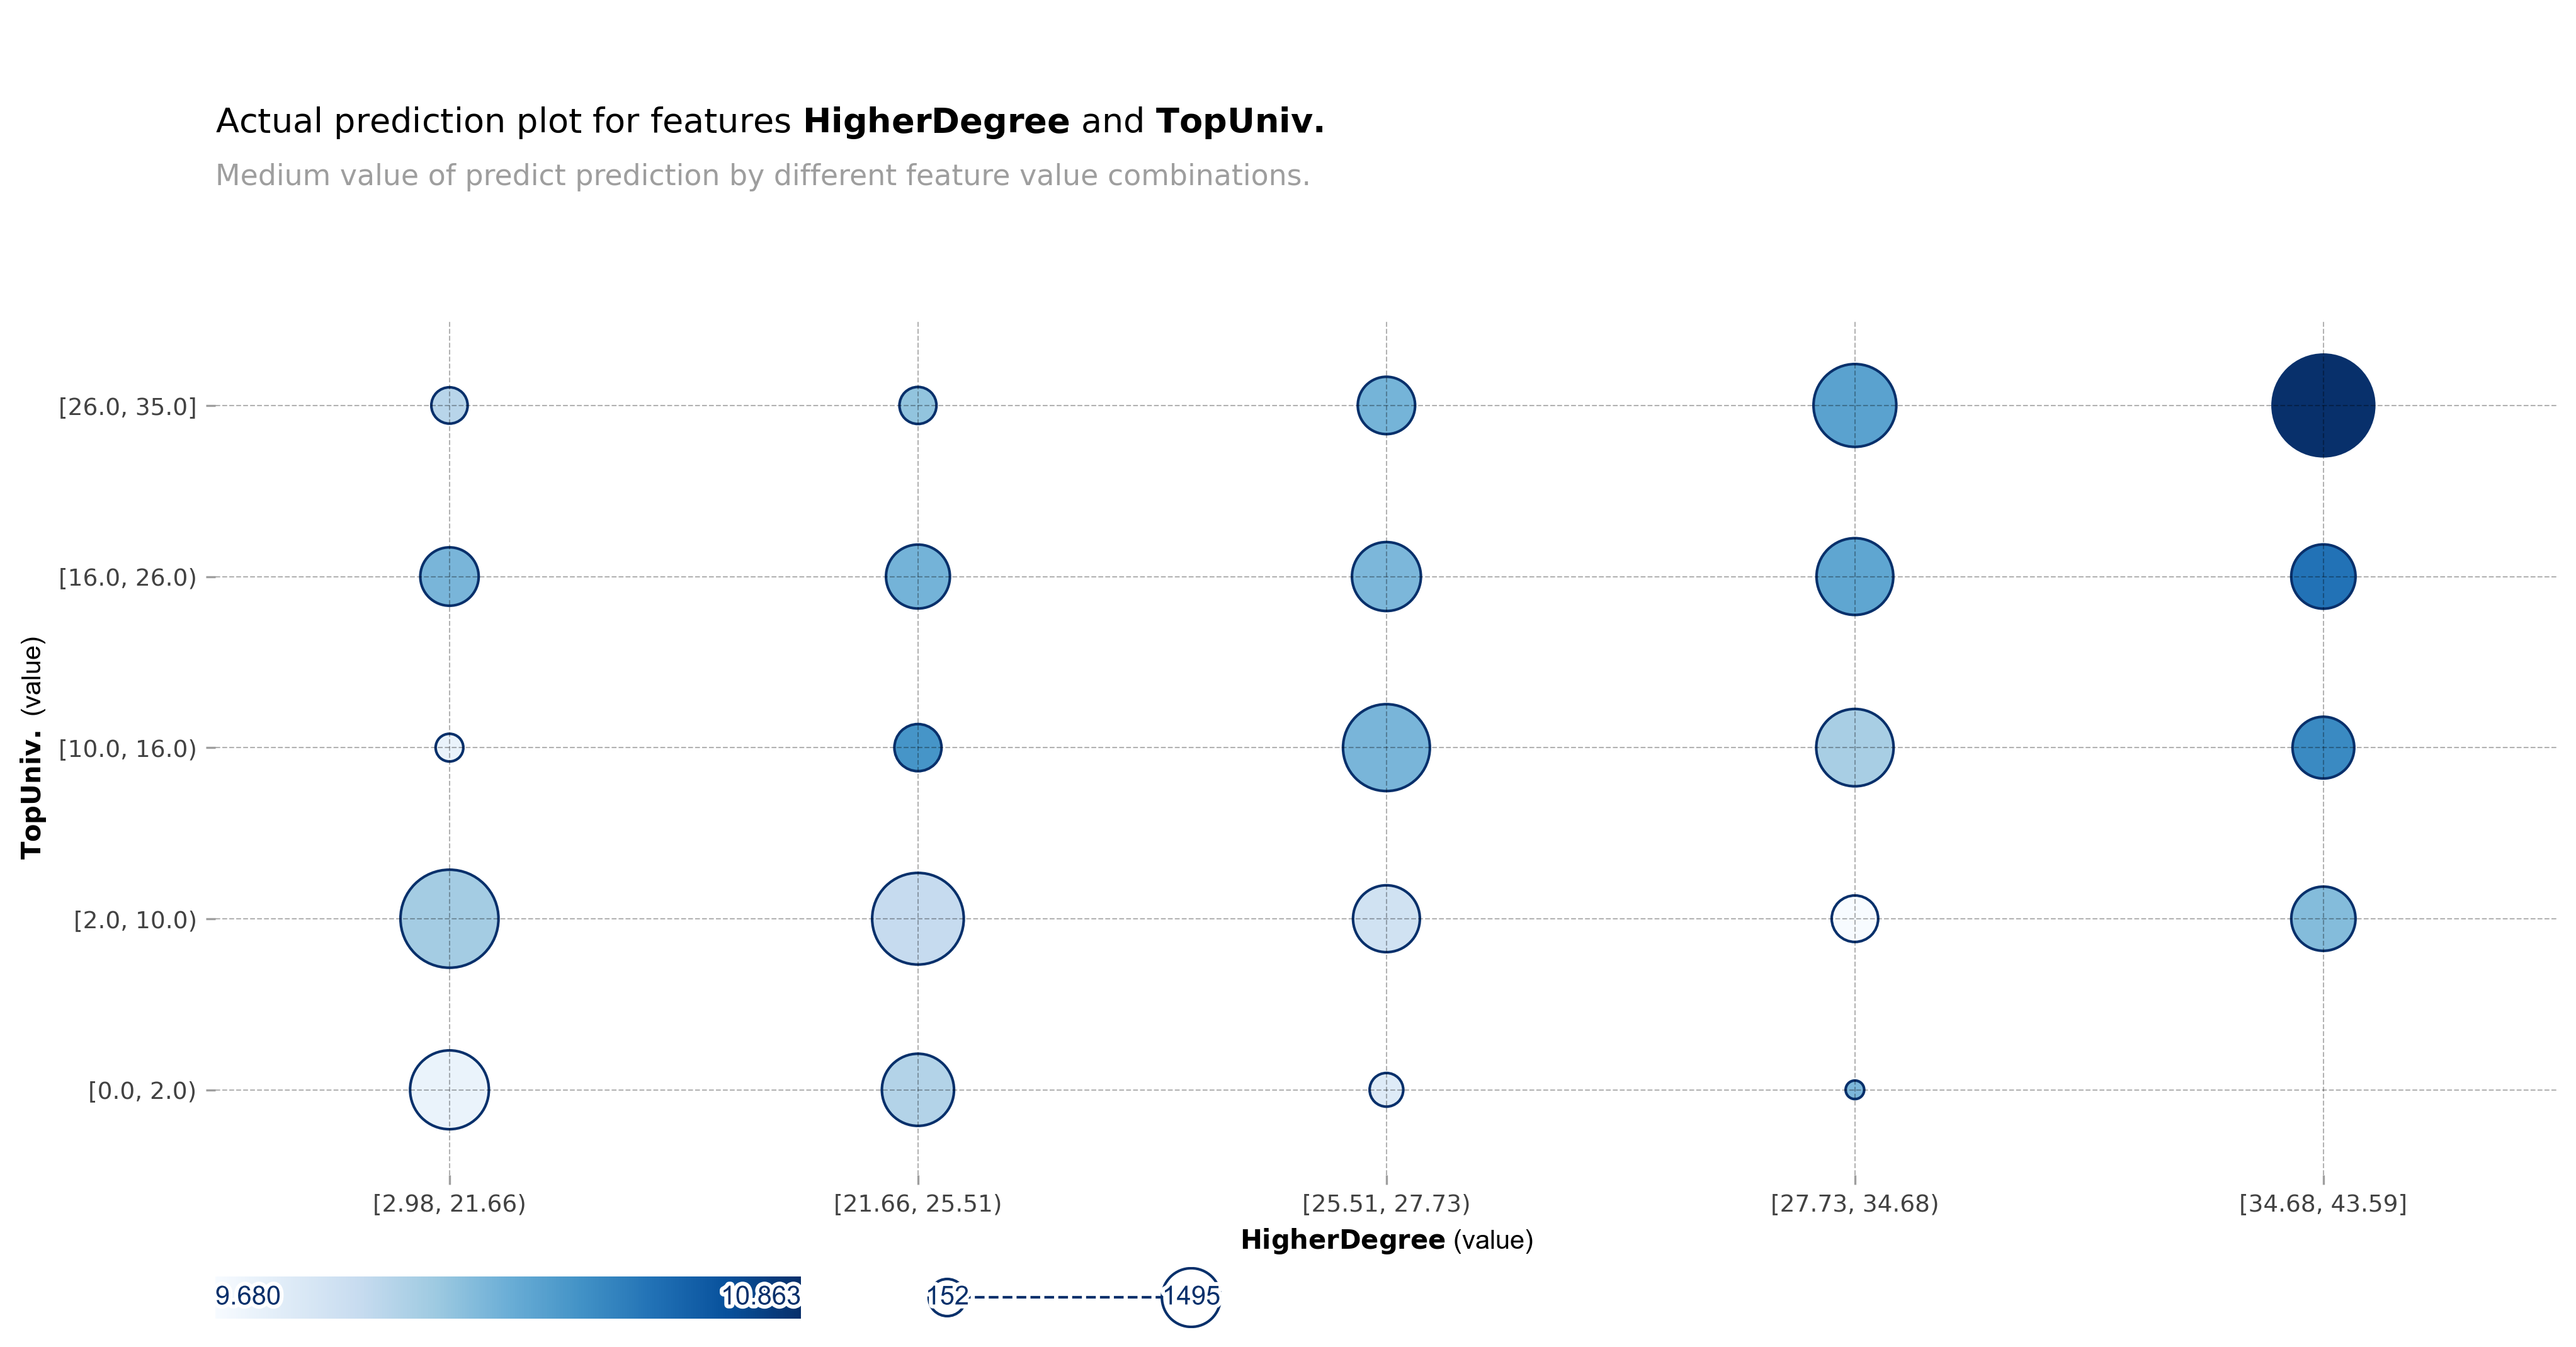

In [72]:
# summary plot does not pin down how the education variables are important
# So, I decided to show the variable importance using force plot.
# However, force plot needs much times to compute, then I will subsample from original dataset with preserving the distribution of original dataset.
# Please use this code cell for calculating shap values by just replacing the target city for better replication.


Data_x_ = Daegu_Test[Columns_]
# Data_x_.columns = [
#     'Area', 'Floor', 'Units', 'Parking', 'Heating', 'Year', 'Greenspace', 'Waterfront', 'Bus stops', 'Subway', 'Top Univ.', 'Sex Ratio', 'Pop. Density'
# , 'Higher Degree', 'Spring', 'Fall', 'Winter']

Data_y_ = pd.DataFrame(Daegu_RF_Y)
Data_y_.columns = ['Housing price']

model = Daegu_RF

info_plots.InteractPredictPlot(
    df = pd.concat([Data_x_, Data_y_], axis = 1), # Should contain feaetures and target variable
    features = ['고학력자비율', '서울대입학자수'],
    feature_names = ['Higher Degree', 'Top Univ.'], # Displayed Name of the feature
    model = model,
    model_features= Columns_,
    num_grid_points= 6,
    n_classes= 0

).plot(engine = 'matplotlib')

In [55]:
pd.concat([Data_x_, Data_y_], axis = 1)

,전용면적,층,세대수,가구당주차,난방연료,건축년도,ln_녹지거리,ln_수변거리,버스정류장수,ln_지하철도로망거리,서울대입학자수,성비,인구밀도,고학력자비율,봄,가을,겨울,Housing price
0,84.9947,5,1068.0,0.99,0,2016,8.211569,7.615714,10,7.076539,1,92.654002,11000.000000,37.158981,1,0,0,10.132198
1,84.9669,4,1326.0,1.33,0,2014,9.927549,7.599527,31,6.054275,13,94.888060,19166.972480,25.794660,0,0,1,10.446054
2,84.9800,13,362.0,1.71,0,2002,9.118269,6.405270,8,7.570851,13,96.928879,7555.555556,28.510034,0,0,1,10.537428
3,84.9200,11,464.0,1.01,0,2005,9.264049,8.194853,12,7.583504,13,97.030705,12602.877700,42.984467,1,0,0,10.489883
4,59.9600,12,3149.0,1.17,0,2018,5.550493,7.250246,24,6.448424,15,92.868035,13816.806720,15.358883,0,1,0,10.690012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16033,84.9900,5,1335.0,1.44,0,2012,9.518731,6.309351,22,6.940520,3,95.611909,12690.322580,39.500378,1,0,0,10.699185
16034,59.8600,18,216.0,1.02,0,2016,5.498662,7.390559,20,5.186059,18,91.854196,31478.846150,20.677210,0,1,0,10.459993
16035,59.9444,3,1117.0,1.01,0,2013,9.986136,6.287237,14,9.835568,18,101.352689,10300.421940,35.173749,1,0,0,9.519938
16036,84.9610,19,508.0,1.13,0,2009,8.885981,5.963180,5,7.966609,13,105.547818,247.623042,16.011202,0,0,0,10.505796


# Difference between HPMs and MLs within group

In [436]:
a = Gwangju_Test[['고학력자비율', '서울대입학자수']]
b_ml = pd.DataFrame(Gwangju_Without_Snu_XGB_Y)
b_ml.columns = ['ML']
b_hpm = pd.DataFrame(Gwangju_Without_Snu_OLS_Y)
b_hpm.columns = ['HPM']
Diff = pd.concat([a,b_ml, b_hpm], axis = 1)
Diff_Sortedby = Diff.sort_values(['서울대입학자수'], ascending = True).reset_index(drop = True)
p = 0.05 * 1
















lower_group = Diff_Sortedby.loc[:round(len(Diff_Sortedby) * p)]
upper_group = Diff_Sortedby.loc[round(len(Diff_Sortedby) * (1-p)):]
print('lower group_ML: ', round(np.mean(lower_group['ML']),3))
print('lower group_HPM: ', round(np.mean(lower_group['HPM']),3))
print('upper group_ML: ', round(np.mean(upper_group['ML']),3))
print('upper group_HPM: ', round(np.mean(upper_group['HPM']),3))
print()
print(f'''Lower Group''')
f_test(lower_group['ML'], lower_group['HPM'])
print('t-test Equal var: ', round(stats.ttest_ind(lower_group['ML'], lower_group['HPM'], equal_var = True)[0], 3))
print('p: ', round(stats.ttest_ind(lower_group['ML'], lower_group['HPM'], equal_var = True)[1], 3))
print('t-test Unequal var: ', round(stats.ttest_ind(lower_group['ML'], lower_group['HPM'], equal_var = False)[0], 3))
print('p: ', round(stats.ttest_ind(lower_group['ML'], lower_group['HPM'], equal_var = False)[1], 3))
print()
print(f'''Upper Group''')
f_test(upper_group['ML'], upper_group['HPM'])
print('t-test Equal var: ', round(stats.ttest_ind(upper_group['ML'], upper_group['HPM'], equal_var = True)[0], 3))
print('p: ', round(stats.ttest_ind(upper_group['ML'], upper_group['HPM'], equal_var = True)[1], 3))
print('t-test Unequal var: ', round(stats.ttest_ind(upper_group['ML'], upper_group['HPM'], equal_var = False)[0], 3))
print('p: ', round(stats.ttest_ind(upper_group['ML'], upper_group['HPM'], equal_var = False)[1], 3))

lower group_ML:  9.813
lower group_HPM:  9.82
upper group_ML:  9.802
upper group_HPM:  9.826

Lower Group
F statistic: 1.346
P value: 0.0
t-test Equal var:  -0.238
p:  0.812
t-test Unequal var:  -0.238
p:  0.812

Upper Group
F statistic: 1.076
P value: 0.173
t-test Equal var:  -1.007
p:  0.314
t-test Unequal var:  -1.007
p:  0.314


## Difference between HPMs and MLs

In [437]:
a = Gwangju_Test[['고학력자비율', '서울대입학자수']]
b = pd.DataFrame(Gwangju_Without_Snu_XGB_Y - Gwangju_Without_Snu_OLS_Y)
b.columns = ['Diff']
Diff = pd.concat([a,b], axis = 1)
# Diff_Sortedby = Diff.sort_values(['고학력자비율'], ascending = True).reset_index(drop = True)
Diff_Sortedby = Diff.sort_values(['서울대입학자수'], ascending = True).reset_index(drop = True)
p = 0.05 * 1









lower_group = Diff_Sortedby.loc[:round(len(Diff_Sortedby) * p)]['Diff']
upper_group = Diff_Sortedby.loc[round(len(Diff_Sortedby) * (1-p)):]['Diff']
print('lower group: ', round(np.mean(lower_group),3))
print('upper group: ', round(np.mean(upper_group),3))
print()
f_test(lower_group, upper_group)
print()
print('t-test Equal var: ', round(stats.ttest_ind(lower_group, upper_group, equal_var = True)[0], 3))
print('p: ', round(stats.ttest_ind(lower_group, upper_group, equal_var = True)[1], 3))
print('t-test Unequal var: ', round(stats.ttest_ind(lower_group, upper_group, equal_var = False)[0], 3))
print('p: ', round(stats.ttest_ind(lower_group, upper_group, equal_var = False)[1], 3))

lower group:  -0.007
upper group:  -0.024

F statistic: 1.891
P value: 0.0

t-test Equal var:  1.439
p:  0.15
t-test Unequal var:  1.439
p:  0.15


In [ ]:
a = Busan_Test[['고학력자비율', 'ln_거래금액']]
b = pd.DataFrame(Busan_Without_Higherdegree_XGB_Y)
b.columns = ['AI']
c = pd.DataFrame(Busan_Without_Higherdegree_OLS_Y)
c.columns = ['HPM']


Diff = pd.concat([a,b,c], axis = 1)


Diff= Diff.sort_values(['고학력자비율'], ascending = True).reset_index(drop = True)

p = 0.4


g = []
gg = []
ggg = []
for i in range(0, int(100/(p*100))):
    g.append(np.mean(Diff.loc[round(len(Diff) * p * i):round(len(Diff) * p * (i+1))]['ln_거래금액']))
    gg.append(np.mean(Diff.loc[round(len(Diff) * p * i):round(len(Diff) * p * (i+1))]['AI']))
    ggg.append(np.mean(Diff.loc[round(len(Diff) * p * i):round(len(Diff) * p * (i+1))]['HPM']))

g = np.array(g)
gg = np.array(gg)
ggg = np.array(ggg)

In [ ]:
a = Daejeon_Test[['고학력자비율', 'ln_거래금액']]
b = pd.DataFrame(Daejeon_Without_Higherdegree_Snu_RF_Y)
b.columns = ['AI']
c = pd.DataFrame(Daejeon_Without_Higherdegree_Snu_OLS_Y)
c.columns = ['HPM']


Diff = pd.concat([a,b,c], axis = 1)


Diff= Diff.sort_values(['고학력자비율'], ascending = True).reset_index(drop = True)

p = 0.25


g = []
gg = []
ggg = []
for i in range(0, int(100/(p*100))):
    g.append(np.mean(Diff.loc[round(len(Diff) * p * i):round(len(Diff) * p * (i+1))]['ln_거래금액']))
    gg.append(np.mean(Diff.loc[round(len(Diff) * p * i):round(len(Diff) * p * (i+1))]['AI']))
    ggg.append(np.mean(Diff.loc[round(len(Diff) * p * i):round(len(Diff) * p * (i+1))]['HPM']))


g = np.array(g)
gg = np.array(gg)
ggg = np.array(ggg)




In [ ]:
a = Busan_Test[['고학력자비율', 'ln_거래금액']]
b = pd.DataFrame(Busan_Without_Higherdegree_Snu_RF_Y - Busan_Without_Higherdegree_Snu_OLS_Y)
b.columns = ['Diff']

c = pd.concat([a,b], axis = 1)
c= c.sort_values(['고학력자비율'], ascending = True).reset_index(drop = True)


a = Daegu_Test[['고학력자비율', 'ln_거래금액']]
b = pd.DataFrame(Daegu_Without_Higherdegree_Snu_RF_Y - Daegu_Without_Higherdegree_Snu_OLS_Y)
b.columns = ['Diff']

cc = pd.concat([a,b], axis = 1)
cc= cc.sort_values(['고학력자비율'], ascending = True).reset_index(drop = True)



a = Daejeon_Test[['고학력자비율', 'ln_거래금액']]
b = pd.DataFrame(Daejeon_Without_Higherdegree_Snu_XGB_Y - Daejeon_Without_Higherdegree_Snu_OLS_Y)
b.columns = ['Diff']

ccc = pd.concat([a,b], axis = 1)
ccc= ccc.sort_values(['고학력자비율'], ascending = True).reset_index(drop = True)



a = Gwangju_Test[['고학력자비율', 'ln_거래금액']]
b = pd.DataFrame(Gwangju_Without_Higherdegree_Snu_XGB_Y - Gwangju_Without_Higherdegree_Snu_OLS_Y)
b.columns = ['Diff']

cccc = pd.concat([a,b], axis = 1)
cccc= cccc.sort_values(['고학력자비율'], ascending = True).reset_index(drop = True)



p = 0.2


g = []
gg = []
ggg = []
gggg = []
for i in range(0, int(100/(p*100))):
    g.append(np.mean(c.loc[round(len(c) * p * i):round(len(c) * p * (i+1))]['Diff']))
    gg.append(np.mean(cc.loc[round(len(cc) * p * i):round(len(cc) * p * (i+1))]['Diff']))
    ggg.append(np.mean(ccc.loc[round(len(ccc) * p * i):round(len(ccc) * p * (i+1))]['Diff']))
    gggg.append(np.mean(cccc.loc[round(len(cccc) * p * i):round(len(cccc) * p * (i+1))]['Diff']))


g = np.array(g)
gg = np.array(gg)
ggg = np.array(ggg)
gggg = np.array(gggg)

In [ ]:
a = Busan_Test[['고학력자비율', 'ln_거래금액']]
b = pd.DataFrame(Busan_RF_Y - Busan_OLS_Y)
b.columns = ['Diff']

c = pd.concat([a,b], axis = 1)
c= c.sort_values(['고학력자비율'], ascending = True).reset_index(drop = True)


a = Daegu_Test[['고학력자비율', 'ln_거래금액']]
b = pd.DataFrame(Daegu_RF_Y - Daegu_OLS_Y)
b.columns = ['Diff']

cc = pd.concat([a,b], axis = 1)
cc= cc.sort_values(['고학력자비율'], ascending = True).reset_index(drop = True)



a = Daejeon_Test[['고학력자비율', 'ln_거래금액']]
b = pd.DataFrame(Daejeon_Without_Snu_XGB_Y - Daejeon_Without_Snu_OLS_Y)
b.columns = ['Diff']

ccc = pd.concat([a,b], axis = 1)
ccc= ccc.sort_values(['고학력자비율'], ascending = True).reset_index(drop = True)



a = Gwangju_Test[['고학력자비율', 'ln_거래금액']]
b = pd.DataFrame(Gwangju_Without_Snu_XGB_Y - Gwangju_Without_Snu_OLS_Y)
b.columns = ['Diff']

cccc = pd.concat([a,b], axis = 1)
cccc= cccc.sort_values(['고학력자비율'], ascending = True).reset_index(drop = True)



p = 0.2


g = []
gg = []
ggg = []
gggg = []
for i in range(0, int(100/(p*100))):
    g.append(np.mean(c.loc[round(len(c) * p * i):round(len(c) * p * (i+1))]['Diff']))
    gg.append(np.mean(cc.loc[round(len(cc) * p * i):round(len(cc) * p * (i+1))]['Diff']))
    ggg.append(np.mean(ccc.loc[round(len(ccc) * p * i):round(len(ccc) * p * (i+1))]['Diff']))
    gggg.append(np.mean(cccc.loc[round(len(cccc) * p * i):round(len(cccc) * p * (i+1))]['Diff']))


g = np.array(g)
gg = np.array(gg)
ggg = np.array(ggg)
gggg = np.array(gggg)

# To remedy the discrepancy

In [ ]:
p = 0.20


a = Busan_Test[['고학력자비율', '서울대입학자수', 'ln_거래금액']]
b = pd.DataFrame(Busan_Without_Higherdegree_Snu_RF_Y - Busan_Without_Higherdegree_Snu_OLS_Y)
b.columns = ['Diff']

c = pd.concat([a,b], axis = 1)
c= c.sort_values(['고학력자비율'], ascending = True).reset_index(drop = True)


a = Daegu_Test[['고학력자비율', '서울대입학자수', 'ln_거래금액']]
b = pd.DataFrame(Daegu_Without_Higherdegree_Snu_RF_Y - Daegu_Without_Higherdegree_Snu_OLS_Y)
b.columns = ['Diff']

cc = pd.concat([a,b], axis = 1)
cc= cc.sort_values(['고학력자비율'], ascending = True).reset_index(drop = True)

g = []
gg = []
for i in range(0, int(100/(p*100))):
    g.append(np.mean(c.loc[round(len(c) * p * i):round(len(c) * p * (i+1))]['Diff']))
    gg.append(np.mean(cc.loc[round(len(cc) * p * i):round(len(cc) * p * (i+1))]['Diff']))


g = np.array(g)
gg = np.array(gg)



a = Busan_Test[['고학력자비율', '서울대입학자수', 'ln_거래금액']]
b = pd.DataFrame(Busan_RF_Y - Busan_OLS_Y)
b.columns = ['Diff']

ccc = pd.concat([a,b], axis = 1)
ccc= ccc.sort_values(['고학력자비율'], ascending = True).reset_index(drop = True)


a = Daegu_Test[['고학력자비율', '서울대입학자수', 'ln_거래금액']]
b = pd.DataFrame(Daegu_RF_Y - Daegu_OLS_Y)
b.columns = ['Diff']

cccc = pd.concat([a,b], axis = 1)
cccc= cccc.sort_values(['고학력자비율'], ascending = True).reset_index(drop = True)


ggg = []
gggg = []
for i in range(0, int(100/(p*100))):
    ggg.append(np.mean(ccc.loc[round(len(ccc) * p * i):round(len(ccc) * p * (i+1))]['Diff']))
    gggg.append(np.mean(cccc.loc[round(len(cccc) * p * i):round(len(cccc) * p * (i+1))]['Diff']))


ggg = np.array(ggg)
gggg = np.array(gggg)



In [ ]:
p = 0.20


a = Busan_Test[['고학력자비율', '서울대입학자수', 'ln_거래금액']]
b = pd.DataFrame(Busan_Without_Higherdegree_Snu_XGB_Y - Busan_Without_Higherdegree_Snu_OLS_Y)
b.columns = ['Diff']

c = pd.concat([a,b], axis = 1)
c= c.sort_values(['고학력자비율'], ascending = True).reset_index(drop = True)


a = Daegu_Test[['고학력자비율', '서울대입학자수', 'ln_거래금액']]
b = pd.DataFrame(Daegu_Without_Higherdegree_Snu_XGB_Y - Daegu_Without_Higherdegree_Snu_OLS_Y)
b.columns = ['Diff']

cc = pd.concat([a,b], axis = 1)
cc= cc.sort_values(['고학력자비율'], ascending = True).reset_index(drop = True)

g = []
gg = []
for i in range(0, int(100/(p*100))):
    g.append(np.mean(c.loc[round(len(c) * p * i):round(len(c) * p * (i+1))]['Diff']))
    gg.append(np.mean(cc.loc[round(len(cc) * p * i):round(len(cc) * p * (i+1))]['Diff']))


g = np.array(g)
gg = np.array(gg)



a = Busan_Test[['고학력자비율', '서울대입학자수', 'ln_거래금액']]
b = pd.DataFrame(Busan_XGB_Y - Busan_OLS_Y)
b.columns = ['Diff']

ccc = pd.concat([a,b], axis = 1)
ccc= ccc.sort_values(['고학력자비율'], ascending = True).reset_index(drop = True)


a = Daegu_Test[['고학력자비율', '서울대입학자수', 'ln_거래금액']]
b = pd.DataFrame(Daegu_XGB_Y - Daegu_OLS_Y)
b.columns = ['Diff']

cccc = pd.concat([a,b], axis = 1)
cccc= cccc.sort_values(['고학력자비율'], ascending = True).reset_index(drop = True)


ggg = []
gggg = []
for i in range(0, int(100/(p*100))):
    ggg.append(np.mean(ccc.loc[round(len(ccc) * p * i):round(len(ccc) * p * (i+1))]['Diff']))
    gggg.append(np.mean(cccc.loc[round(len(cccc) * p * i):round(len(cccc) * p * (i+1))]['Diff']))


ggg = np.array(ggg)
gggg = np.array(gggg)

In [ ]:
p = 0.20


a = Busan_Test[['고학력자비율', '서울대입학자수', 'ln_거래금액']]
b = pd.DataFrame(Busan_Without_Higherdegree_Snu_RF_Y - Busan_Without_Higherdegree_Snu_OLS_Y)
b.columns = ['Diff']

c = pd.concat([a,b], axis = 1)
c= c.sort_values(['서울대입학자수'], ascending = True).reset_index(drop = True)


a = Daegu_Test[['고학력자비율', '서울대입학자수', 'ln_거래금액']]
b = pd.DataFrame(Daegu_Without_Higherdegree_Snu_RF_Y - Daegu_Without_Higherdegree_Snu_OLS_Y)
b.columns = ['Diff']

cc = pd.concat([a,b], axis = 1)
cc= cc.sort_values(['서울대입학자수'], ascending = True).reset_index(drop = True)

g = []
gg = []
for i in range(0, int(100/(p*100))):
    g.append(np.mean(c.loc[round(len(c) * p * i):round(len(c) * p * (i+1))]['Diff']))
    gg.append(np.mean(cc.loc[round(len(cc) * p * i):round(len(cc) * p * (i+1))]['Diff']))


g = np.array(g)
gg = np.array(gg)



a = Busan_Test[['고학력자비율', '서울대입학자수', 'ln_거래금액']]
b = pd.DataFrame(Busan_RF_Y - Busan_OLS_Y)
b.columns = ['Diff']

ccc = pd.concat([a,b], axis = 1)
ccc= ccc.sort_values(['서울대입학자수'], ascending = True).reset_index(drop = True)


a = Daegu_Test[['고학력자비율', '서울대입학자수', 'ln_거래금액']]
b = pd.DataFrame(Daegu_RF_Y - Daegu_OLS_Y)
b.columns = ['Diff']

cccc = pd.concat([a,b], axis = 1)
cccc= cccc.sort_values(['서울대입학자수'], ascending = True).reset_index(drop = True)


ggg = []
gggg = []
for i in range(0, int(100/(p*100))):
    ggg.append(np.mean(ccc.loc[round(len(ccc) * p * i):round(len(ccc) * p * (i+1))]['Diff']))
    gggg.append(np.mean(cccc.loc[round(len(cccc) * p * i):round(len(cccc) * p * (i+1))]['Diff']))


ggg = np.array(ggg)
gggg = np.array(gggg)

In [ ]:
p = 0.20


a = Busan_Test[['고학력자비율', '서울대입학자수', 'ln_거래금액']]
b = pd.DataFrame(Busan_Without_Higherdegree_Snu_XGB_Y - Busan_Without_Higherdegree_Snu_OLS_Y)
b.columns = ['Diff']

c = pd.concat([a,b], axis = 1)
c= c.sort_values(['서울대입학자수'], ascending = True).reset_index(drop = True)


a = Daegu_Test[['고학력자비율', '서울대입학자수', 'ln_거래금액']]
b = pd.DataFrame(Daegu_Without_Higherdegree_Snu_XGB_Y - Daegu_Without_Higherdegree_Snu_OLS_Y)
b.columns = ['Diff']

cc = pd.concat([a,b], axis = 1)
cc= cc.sort_values(['서울대입학자수'], ascending = True).reset_index(drop = True)

g = []
gg = []
for i in range(0, int(100/(p*100))):
    g.append(np.mean(c.loc[round(len(c) * p * i):round(len(c) * p * (i+1))]['Diff']))
    gg.append(np.mean(cc.loc[round(len(cc) * p * i):round(len(cc) * p * (i+1))]['Diff']))


g = np.array(g)
gg = np.array(gg)



a = Busan_Test[['고학력자비율', '서울대입학자수', 'ln_거래금액']]
b = pd.DataFrame(Busan_XGB_Y - Busan_OLS_Y)
b.columns = ['Diff']

ccc = pd.concat([a,b], axis = 1)
ccc= ccc.sort_values(['서울대입학자수'], ascending = True).reset_index(drop = True)


a = Daegu_Test[['고학력자비율', '서울대입학자수', 'ln_거래금액']]
b = pd.DataFrame(Daegu_XGB_Y - Daegu_OLS_Y)
b.columns = ['Diff']

cccc = pd.concat([a,b], axis = 1)
cccc= cccc.sort_values(['서울대입학자수'], ascending = True).reset_index(drop = True)


ggg = []
gggg = []
for i in range(0, int(100/(p*100))):
    ggg.append(np.mean(ccc.loc[round(len(ccc) * p * i):round(len(ccc) * p * (i+1))]['Diff']))
    gggg.append(np.mean(cccc.loc[round(len(cccc) * p * i):round(len(cccc) * p * (i+1))]['Diff']))


ggg = np.array(ggg)
gggg = np.array(gggg)

In [475]:
p = 0.2

a = Daegu_Test[['고학력자비율', '서울대입학자수', 'ln_거래금액']]
b = pd.DataFrame(Daegu_Without_Higherdegree_Snu_RF_Y - Daegu_Without_Higherdegree_Snu_OLS_Y)
b.columns = ['Diff']

c = pd.concat([a,b], axis = 1)
c= c.sort_values(['고학력자비율'], ascending = True).reset_index(drop = True)

g_mean = []
g_std = []
for i in range(0, int(100/(p*100))):
    g_mean.append(np.mean(c.loc[round(len(c) * p * i):round(len(c) * p * (i+1))]['Diff']))
    g_std.append(np.std(c.loc[round(len(c) * p * i):round(len(c) * p * (i+1))]['Diff']))


g_mean = np.array(g_mean)
g_std = np.array(g_std)



a = Daegu_Test[['고학력자비율', '서울대입학자수', 'ln_거래금액']]
b = pd.DataFrame(Daegu_RF_Y - Daegu_OLS_Y)
b.columns = ['Diff']

c = pd.concat([a,b], axis = 1)
c= c.sort_values(['고학력자비율'], ascending = True).reset_index(drop = True)

gg_mean = []
gg_std = []
for i in range(0, int(100/(p*100))):
    gg_mean.append(np.mean(c.loc[round(len(c) * p * i):round(len(c) * p * (i+1))]['Diff']))
    gg_std.append(np.std(c.loc[round(len(c) * p * i):round(len(c) * p * (i+1))]['Diff']))


gg_mean = np.array(gg_mean)
gg_std = np.array(gg_std)







a = Daegu_Test[['고학력자비율', '서울대입학자수', 'ln_거래금액']]
b = pd.DataFrame(Daegu_Without_Higherdegree_Snu_RF_Y - Daegu_Without_Higherdegree_Snu_OLS_Y)
b.columns = ['Diff']

c = pd.concat([a,b], axis = 1)
c= c.sort_values(['서울대입학자수'], ascending = True).reset_index(drop = True)

ggg_mean = []
ggg_std = []
for i in range(0, int(100/(p*100))):
    ggg_mean.append(np.mean(c.loc[round(len(c) * p * i):round(len(c) * p * (i+1))]['Diff']))
    ggg_std.append(np.std(c.loc[round(len(c) * p * i):round(len(c) * p * (i+1))]['Diff']))


ggg_mean = np.array(ggg_mean)
ggg_std = np.array(ggg_std)



a = Daegu_Test[['고학력자비율', '서울대입학자수', 'ln_거래금액']]
b = pd.DataFrame(Daegu_RF_Y - Daegu_OLS_Y)
b.columns = ['Diff']

c = pd.concat([a,b], axis = 1)
c= c.sort_values(['서울대입학자수'], ascending = True).reset_index(drop = True)

gggg_mean = []
gggg_std = []
for i in range(0, int(100/(p*100))):
    gggg_mean.append(np.mean(c.loc[round(len(c) * p * i):round(len(c) * p * (i+1))]['Diff']))
    gggg_std.append(np.std(c.loc[round(len(c) * p * i):round(len(c) * p * (i+1))]['Diff']))


gggg_mean = np.array(gggg_mean)
gggg_std = np.array(gggg_std)

In [479]:
ggg_mean, gggg_mean

(array([-0.11173498, -0.03416718, -0.01763604,  0.01985752,  0.14156542]),
 array([ 0.00953272, -0.01170309,  0.00028717, -0.0056663 ,  0.00672987]))

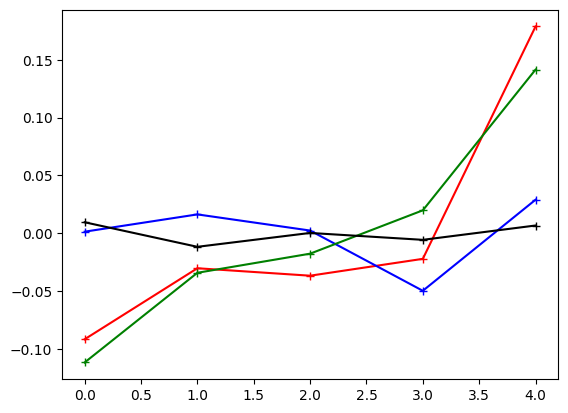

In [480]:
plt.figure()
plt.plot(g_mean, 'r+-')
plt.plot(gg_mean, 'b+-')
plt.plot(ggg_mean, 'g+-')
plt.plot(gggg_mean, 'k+-')
plt.show()

### Daegu, RF - OLS, based on higher degree without two variables

In [481]:
g_mean, g_std

(array([-0.09166871, -0.03024162, -0.0366852 , -0.02210879,  0.17885594]),
 array([0.24345288, 0.21388351, 0.20807017, 0.26372557, 0.32931939]))

### Daegu, RF - OLS, based on higher degree with two variables

In [482]:
gg_mean, gg_std

(array([ 0.00137754,  0.01632708,  0.00236631, -0.04973164,  0.02903281]),
 array([0.24282842, 0.20318126, 0.19796166, 0.24522424, 0.298014  ]))

### Daegu, RF - OLS, based on SNU without two variables

In [483]:
ggg_mean, ggg_std

(array([-0.11173498, -0.03416718, -0.01763604,  0.01985752,  0.14156542]),
 array([0.22299627, 0.19860104, 0.24377951, 0.23256468, 0.36372941]))

### Daegu, RF - OLS, based on SNU with two variables

In [485]:
gggg_mean, gggg_std

(array([ 0.00953272, -0.01170309,  0.00028717, -0.0056663 ,  0.00672987]),
 array([0.22721113, 0.18019467, 0.23177136, 0.22264939, 0.32291098]))